---

# Advanced Regression Assignment

### `Prediction of price of houses`

---

In [1]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# set other options
pd.set_option('.max_columns', None)
%matplotlib inline
sns.set_style('darkgrid')

## Step1: Read and understand the data

In [2]:
# load the data
houses_df = pd.read_csv('train.csv')

In [3]:
# check head
houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# check shape
houses_df.shape

(1460, 81)

In [5]:
# check info
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# create generic functions to extract categorical and numerical columns
def get_cat_cols(df):
    return df.select_dtypes('object').columns

def get_num_cols(df):
    return df.select_dtypes(['int64', 'float64']).columns

In [7]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(houses_df)
num_cols = get_num_cols(houses_df)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 43
Numerical Columns: 38


In [8]:
# check summary of numerical columns
houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Visualize and clean the data

In [9]:
# check if any row has all the values as missing/NAN
houses_df[houses_df.isnull().all(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no rows with all the columns as missing

In [10]:
# check for duplicate rows
houses_df[houses_df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no duplicate data

In [11]:
# Check missing / null values across columns
# Since there are a lot of features / columns, check for null values based on categorical and numerical features separately:
# 1. Catgorical Columns = 43
# 2. Numerical Columns = 38

# Missing values for Categorical Columns
print(round(100*(houses_df[cat_cols].isnull().sum() / houses_df.shape[0]),2))

MSZoning          0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinType2      2.60
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
KitchenQual       0.00
Functional        0.00
FireplaceQu      47.26
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
SaleType          0.00
SaleCondition     0.00
dtype: floa

In [12]:
# function to extract columns that have missing values into a data frame
def create_dataframe_missing_vals(arr):
    values = []
    cols = []
    for col in arr:
        if houses_df[col].isnull().sum() / houses_df.shape[0] > 0.0:
            values.append(round(100*(houses_df[col].isnull().sum() / houses_df.shape[0]),2))
            cols.append(col)

    data = {'Columns with missing values': cols, 'Missing %age': values}
    df = pd.DataFrame(data)
    df.sort_values(by='Missing %age', ascending=False, inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df

In [13]:
# print data frame with missing values of categorical columns
cat_cols_df = create_dataframe_missing_vals(cat_cols)
cat_cols_df

,Columns with missing values,Missing %age
0,PoolQC,99.52
1,MiscFeature,96.30
2,Alley,93.77
3,Fence,80.75
4,FireplaceQu,47.26
5,GarageType,5.55
6,GarageFinish,5.55
7,GarageQual,5.55
8,GarageCond,5.55
9,BsmtExposure,2.60


Check and **drop columns that have more than 80% missing values**, since there will be **high imbalance** and **skewness** in the data, even if imputed with some data. They will ***NOT be significant in prediction of prices of the houses***.

In [14]:
# create a list to store the name of columns that have more than 80% missing values
cols_to_drop = list(cat_cols_df.loc[cat_cols_df['Missing %age'] > 80]['Columns with missing values'])

for col in cols_to_drop:
    print(houses_df[col].value_counts())
    print('---------------------------')

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
---------------------------
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
---------------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
---------------------------
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
---------------------------


In [15]:
# function to drop the columns from the data frame
def drop_columns(cols):
    houses_df.drop(columns=cols, axis=1, inplace=True)

In [16]:
# drop the above columns
drop_columns(cols_to_drop)

# empty the list
cols_to_drop = []

# check shape again
houses_df.shape

(1460, 77)

In [17]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(houses_df)
num_cols = get_num_cols(houses_df)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 39
Numerical Columns: 38


In [18]:
# print data frame with missing values of categorical columns
cat_cols_df = create_dataframe_missing_vals(cat_cols)
cat_cols_df

,Columns with missing values,Missing %age
0,FireplaceQu,47.26
1,GarageType,5.55
2,GarageFinish,5.55
3,GarageQual,5.55
4,GarageCond,5.55
5,BsmtExposure,2.60
6,BsmtFinType2,2.60
7,BsmtQual,2.53
8,BsmtCond,2.53
9,BsmtFinType1,2.53


For the below columns, the missing values can be **imputed by some meaninful information**, since in the data disctionary for these columns it's given **'NA' as a level** describing them as either **'No basement' or 'No Fireplace', etc**. They are not actually missing values, python has considered them NAN's, since their values are given as 'NA'.
Hence, the for the columns below, the **imputation** can be as follows:

1. FireplaceQu - **No Fireplace**
2. GarageType - **No Garage**
3. GarageFinish - **No Garage**
4. GarageQual - **No Garage**
5. GarageCond - **No Garage**
6. BsmtExposure - **No Basement**
7. BsmtFinType2 - **No Basement**
8. BsmtQual - **No Basement**
9. BsmtCond - **No Basement**
10. BsmtFinType1 - **No Basement**

In [19]:
# function to impute values for columns having missing values
def impute(col, value):
    houses_df.loc[houses_df[col].isnull(), [col]] = value

In [20]:
# impute the columns with the said information
impute('FireplaceQu', 'No Fireplace')
impute('GarageType', 'No Garage')
impute('GarageFinish', 'No Garage')
impute('GarageQual', 'No Garage')
impute('GarageCond', 'No Garage')
impute('BsmtExposure', 'No Basement')
impute('BsmtFinType2', 'No Basement')
impute('BsmtQual', 'No Basement')
impute('BsmtCond', 'No Basement')
impute('BsmtFinType1', 'No Basement')

In [21]:
# print data frame with missing values of categorical columns
cat_cols_df = create_dataframe_missing_vals(cat_cols)
cat_cols_df

,Columns with missing values,Missing %age
0,MasVnrType,0.55
1,Electrical,0.07


In [22]:
# check value counts of the remaining categorical columns with missing values
check_cols_to_impute = list(cat_cols_df['Columns with missing values'])

for col in check_cols_to_impute:
    print(houses_df[col].value_counts())
    print('---------------------------')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
---------------------------
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
---------------------------


In [23]:
# function to create barplots      
def barplot(cols,y,figsize,estimator,ylabel):
    plt.figure(figsize=figsize)
    q = len(cols) // 2
    r = len(cols) % 2
    for col in enumerate(cols):
        plt.subplot(q+r, 2, col[0]+1)
        plt.xlabel(col[1], fontsize='x-large')
        plt.ylabel(ylabel, fontsize='x-large')
        sns.barplot(houses_df[col[1]], y, estimator=estimator)

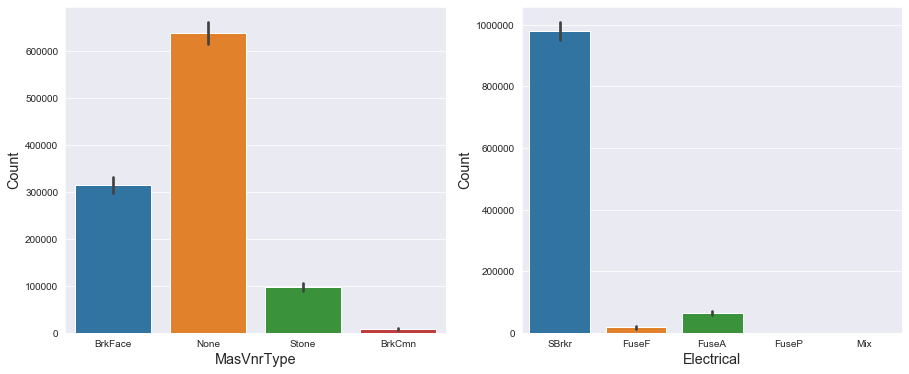

In [24]:
# visualize the remaining categorical columns with missing values
barplot(check_cols_to_impute, houses_df.index,(15,6), sum, 'Count')

From the above graphs, it can be inferred:
1. NAN's of **MasVnrType** column can be imputed by **'None'**, since it has the majority of the count.
2. **Electrical** column can be **dropped**, since there **is huge imbalance** in the data of this column. The favour is towards the level ***'SBrkr' (Standard Circuit Breakers & Romex)**. This column will **NOT be useful in prediction of prices of the houses**.

In [25]:
# impute the NAN's of column 'MasVnrType'
impute('MasVnrType', 'None')

In [26]:
# drop the column 'Electrical'
drop_columns(['Electrical'])

# empty the list
check_cols_to_impute = []

# check shape again
houses_df.shape

(1460, 76)

In [27]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(houses_df)
num_cols = get_num_cols(houses_df)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 38
Numerical Columns: 38


In [28]:
# print data frame with missing values of categorical columns
cat_cols_df = create_dataframe_missing_vals(cat_cols)
cat_cols_df

,Columns with missing values,Missing %age


In [29]:
# Missing values for Categorical Columns
print(round(100*(houses_df[cat_cols].isnull().sum() / houses_df.shape[0]),2))

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64


### Missing values of categorical columns have been taken care of.

In [30]:
# Missing values for Numerical Columns
print(round(100*(houses_df[num_cols].isnull().sum() / houses_df.shape[0]),2))

Id                0.00
MSSubClass        0.00
LotFrontage      17.74
LotArea           0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
MasVnrArea        0.55
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageYrBlt       5.55
GarageCars        0.00
GarageArea        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SalePrice         0.00
dtype: float64


In [31]:
# print data frame with missing values of numerical columns
num_cols_df = create_dataframe_missing_vals(num_cols)
num_cols_df

,Columns with missing values,Missing %age
0,LotFrontage,17.74
1,GarageYrBlt,5.55
2,MasVnrArea,0.55


In [32]:
# function to create distplots      
def hist(cols,figsize):
    plt.figure(figsize=figsize)
    q = len(cols) // 2
    r = len(cols) % 2
    for col in enumerate(cols):
        plt.subplot(q+r, 2, col[0]+1)
        plt.xlabel(col[1], fontsize='x-large')
        plt.hist(houses_df[col[1]])

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
69.0
---------------------------
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29

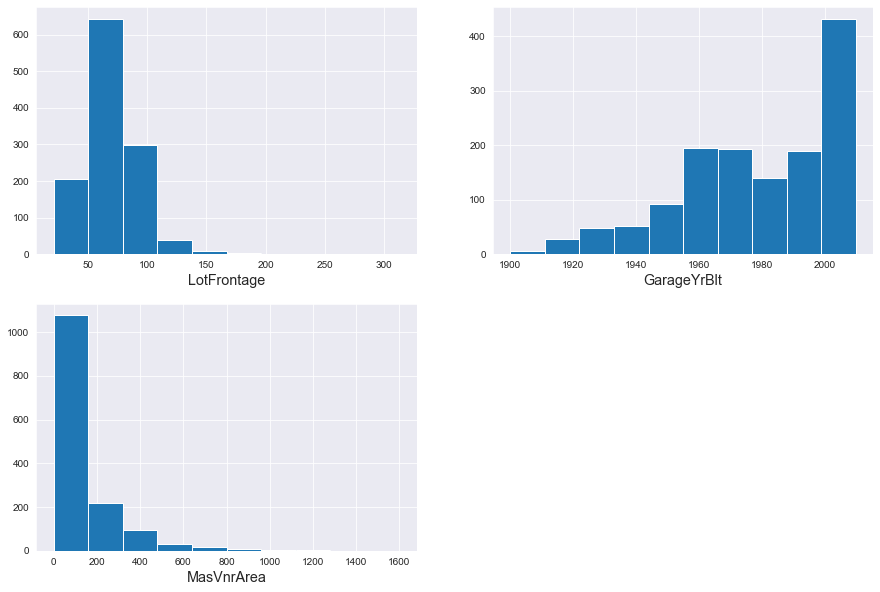

In [33]:
# check value counts of the remaining numerical columns with missing values
check_cols_to_impute = list(num_cols_df['Columns with missing values'])

for col in check_cols_to_impute:
    print(houses_df[col].value_counts())
    print(houses_df[col].median())
    print('---------------------------')
    
hist(check_cols_to_impute, (15,10))    

The following numerical columns with missing data can be imputed with **median**, since by the histograms above there seem to a lot of outliers in these columns and imputing with median would be a better choice compared to imputing with mean:
1. LotFrontage
2. GarageYrBlt
3. MasVnrArea

In [34]:
# impute the columns with the above values
impute('LotFrontage', houses_df['LotFrontage'].median())
impute('GarageYrBlt', houses_df['GarageYrBlt'].median())
impute('MasVnrArea', houses_df['MasVnrArea'].median())

In [35]:
# Missing values for Numerical Columns
print(round(100*(houses_df[num_cols].isnull().sum() / houses_df.shape[0]),2))

Id               0.0
MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
dtype: float64


In [36]:
# print data frame with missing values of numerical columns
num_cols_df = create_dataframe_missing_vals(num_cols)
num_cols_df

,Columns with missing values,Missing %age


### Missing values of numerical columns have been taken care of.

### Create derived features

1. **Age**: This feature can be created using **'YearRemodAdd'** & **YrSold**, since remodelling can be considered as building the house from scratch or incorporating only some modifications, which can imply that the house that didn't have any remodelling and was built in the year same as the year a particular house was remodelled, then the price of the house without remodelling could probably be higher than the house that was remodelled in that year. Also, if **'YearBuilt'** & **'YearRemodAdd'** are same then the age will automatically be cosidered from **'YearBuilt'**.


2. **Rebuilt**: This fetaure can be created using **'YearBuilt'** & **'YearRemodAdd'**, where **1** indicates that there was a remodelling/addition occured on the house and **0** indicates there was no remodelling.


3. **New**: This features can be created using **'YearBuilt'** & **YrSold**. If they are same, then the house can be considered as a new house, where **1** indicating the house is new.

In [37]:
# derived features
houses_df['Rebuilt'] = pd.Series(map(lambda x,y: 0 if x == y else 1, houses_df['YearBuilt'],houses_df['YearRemodAdd']))
houses_df['Age'] = houses_df['YrSold'] - houses_df['YearRemodAdd']
houses_df['New'] = pd.Series(map(lambda x,y: 1 if x == y else 0, houses_df['YearBuilt'],houses_df['YrSold']))
houses_df.shape

(1460, 79)

In [38]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(houses_df)
num_cols = get_num_cols(houses_df)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 38
Numerical Columns: 41


In [39]:
# function to create scatter plots between target variable and predictors      
def scatter(cols,figsize):
    plt.figure(figsize=figsize)
    q = len(cols) // 2
    r = len(cols) % 2
    for col in enumerate(cols):
        plt.subplot(q+r, 2, col[0]+1)
        plt.xlabel(col[1], fontsize='x-large')
        plt.ylabel('SalePrice', fontsize='x-large')
        plt.title('SalePrice vs ' + col[1], fontsize='xx-large')
        sns.scatterplot(x=houses_df[col[1]], y=houses_df['SalePrice'])

### Visualize derived features with 'SalePrice'

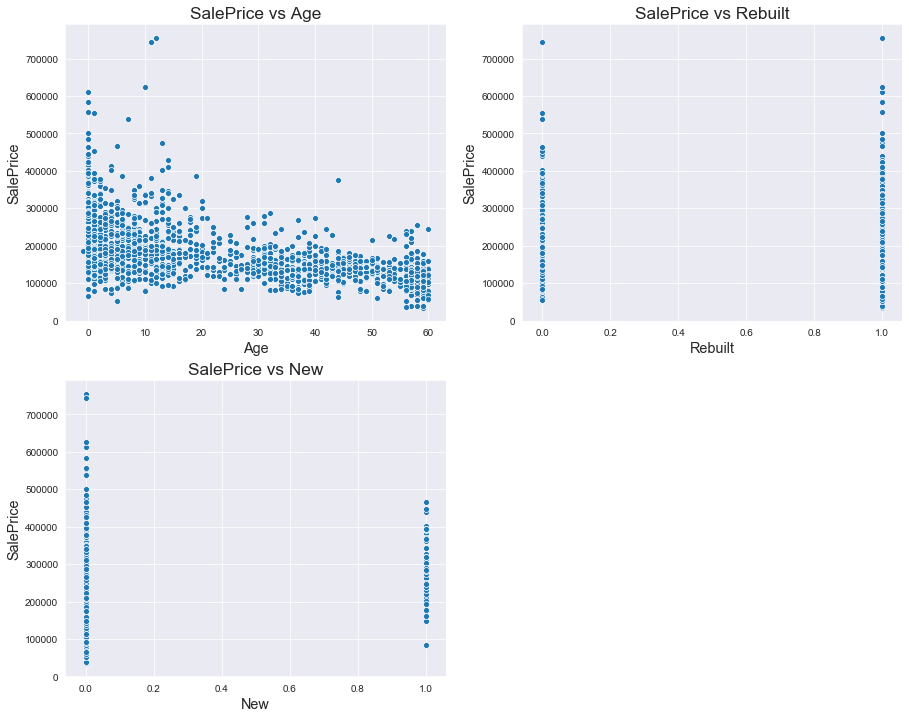

In [40]:
# create scatter plot between the derived features and target variable    
scatter(['Age', 'Rebuilt', 'New'], (15,12))

- As the **Age** of the house increases, the **SalePrice** decreases. 
- There seem to be more number of old houses as compared to the new houses. Let's check the average Sale price of them and compare.

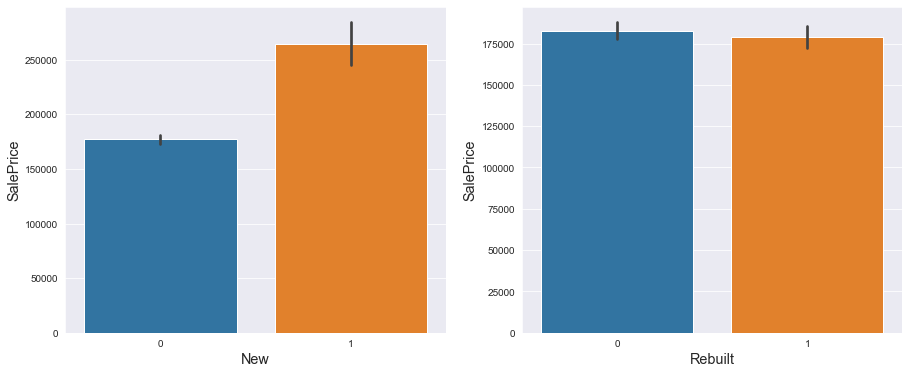

In [41]:
# create barplot of 'New' vs 'SalePrice'
barplot(['New', 'Rebuilt'], houses_df['SalePrice'],(15,6), np.mean, 'SalePrice')

- On a average, new houses have **higher Sales price** than the old houses.
- Whether the house is rebuilt or not, the average sale price is almost the same for them.

### Changing data types of the below columns:
1. **MoSold (Month Sold (MM))** - It cannot be considered as a numerical feature as there is no month which is better than the other. There is no order here.
2. **YrSold (Year Sold (YYYY))** - The houses sold in successive years doesn't mean that the price of those houses will be more than the price of the houses sold previously

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
---------------------------
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
---------------------------


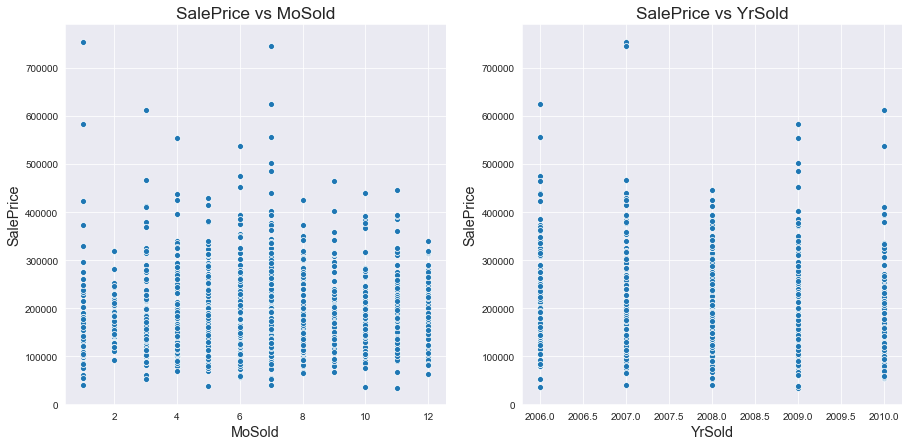

In [42]:
# check value counts of the columns 'MoSold' & 'YrSold'
check_num_to_cat_cols = ['MoSold', 'YrSold']
for col in check_num_to_cat_cols:
    print(houses_df[col].value_counts())
    print('---------------------------')

# create scatter plot between the above columns and target variable    
scatter(check_num_to_cat_cols, (15,7))

As **assumed** that houses sold in progressive year does not mean that they are worth more than the houses sold previously. The logic holds true for the column 'MoSold'. It's safe to convert them to categorical cols

In [43]:
# convert them to categories (object)
houses_df[check_num_to_cat_cols] = houses_df[check_num_to_cat_cols].astype('object')

# check info of them
houses_df[check_num_to_cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
MoSold    1460 non-null object
YrSold    1460 non-null object
dtypes: object(2)
memory usage: 22.9+ KB


In [44]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(houses_df)
num_cols = get_num_cols(houses_df)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 40
Numerical Columns: 39


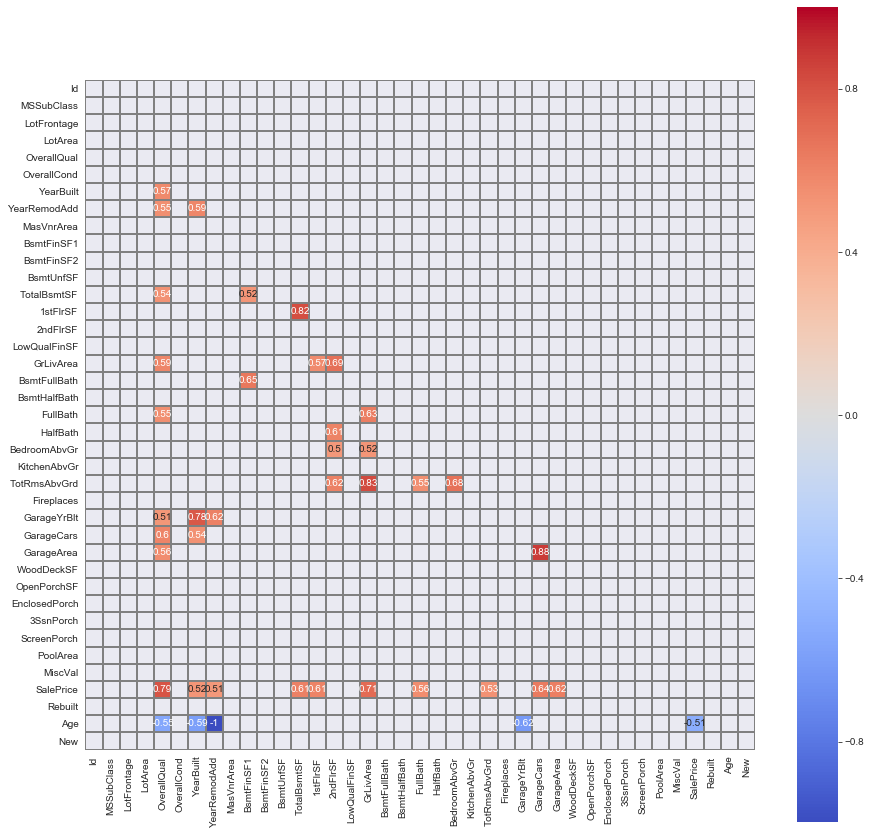

In [45]:
# plot heat map of highly correlated variables
# 1. correlations more than 0.5 (positive correlations)
# 2. correlations less tha -0.5 (negative correlations)
plt.figure(figsize=(15,15))
matrix= np.triu(houses_df[num_cols].corr())
corr = houses_df[num_cols].corr()
corr_new = corr[(corr > 0.5) | (corr < -0.5)]
sns.heatmap(corr_new, annot=True,cmap= 'coolwarm', square=True, mask=matrix,linecolor='gray', linewidths=1)

In [46]:
# create data frame of all the correlations amongst each other
corr_df = pd.DataFrame(houses_df[num_cols].corr().unstack().sort_values(ascending=False).drop_duplicates())
corr_df.reset_index(inplace=True)
corr_df.columns = ['Var 1','Var 2','Correlations']

# display only the variables that are highly correlated with 'SalePrice', both in positive and negative
corr_df.loc[((corr_df['Var 1'] == 'SalePrice') | (corr_df['Var 2'] == 'SalePrice')) & 
       ((corr_df['Correlations'] > 0.5) | (corr_df['Correlations'] < -0.5))]

,Var 1,Var 2,Correlations
4,SalePrice,OverallQual,0.790982
6,SalePrice,GrLivArea,0.708624
10,SalePrice,GarageCars,0.640409
12,GarageArea,SalePrice,0.623431
15,TotalBsmtSF,SalePrice,0.613581
17,1stFlrSF,SalePrice,0.605852
24,FullBath,SalePrice,0.560664
30,SalePrice,TotRmsAbvGrd,0.533723
31,YearBuilt,SalePrice,0.522897
35,YearRemodAdd,SalePrice,0.507101


### Inferences on the variables highly correlated with the target variable 'SalePrice'
1. OverallQual
2. GrLivArea
3. GarageCars

The above 3 are the most correlated features with 'SalePrice'


- **GrLivArea** & **TotRmsAbvGrd** are highly correlated themselves. It makes sense, since **GrLivArea** describes *Above grade (ground) living area square feet* and **TotRmsAbvGrd** describes *Total rooms above grade (does not include bathrooms)*. More the area, more the number of rooms can be built. Hence, only one of the features is enough for prediction. Let's keep **GrLivArea**, since it has higher correlation with **'SalePrice'**


- **GarageCars** & **GarageArea** are also highly correlated among themselves. Here, it makes sense too, since the number of cars that can be fit into a garage depends on the area of the garage. Hence, only one of them is sufficient in the prediction. Keeping **GarageCars**, since it has higher correlations with the **'SalePrice'**.


- Same goes with **TotalBsmtSF** & **1stFlrSF**: highly correlated. **1stFlrSF** describes *First Floor square feet* and **TotalBsmtSF** describes *Total square feet of basement area*. Can keep any one of them. Keeping **TotalBsmtSF**.


- **Age** is extremely highly correlated with the feature **YearRemodAdd**, since **Age** WAS derived out of it. Even though **Age** is not highly correlated with **SalePrice**, it can be an important factor w.r.t buying a house from business point of view and also as seen before it has some negative correlations with the target variable, but since it's highly correlated with **YearRemodAdd**, let's drop **YearRemodAdd** and keep only **Age** for prediction.


In [47]:
# create list to drop features as explained above
cols_to_drop = ['TotRmsAbvGrd', 'GarageArea', '1stFlrSF', 'YearRemodAdd']

# drop the columns
drop_columns(cols_to_drop)

# empty the list
cols_to_drop = []

# check shape again
houses_df.shape

(1460, 75)

In [48]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(houses_df)
num_cols = get_num_cols(houses_df)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 40
Numerical Columns: 35


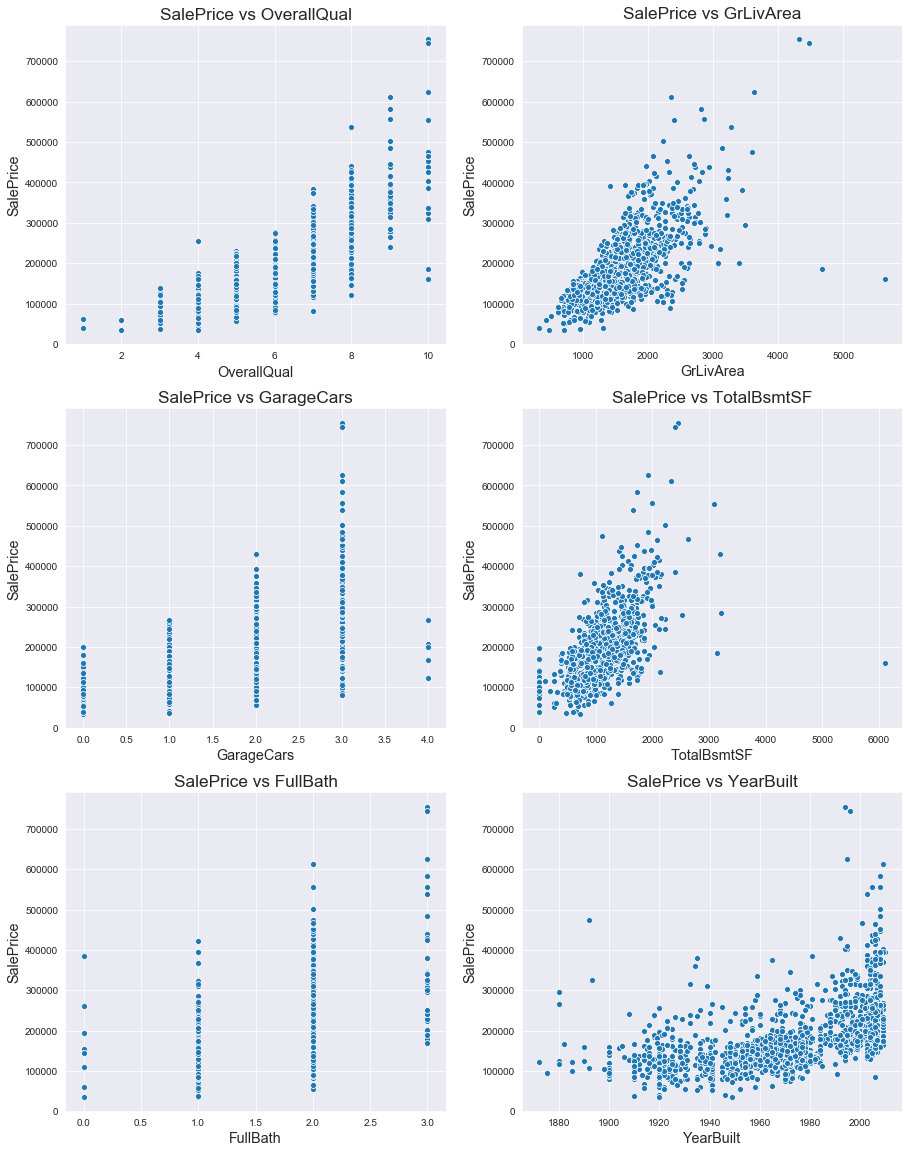

In [49]:
# create scatter plot between the highly correlated features and target variable    
corr_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# plot scatter
scatter(corr_vars, (15,20))

### Inferences:
1. More the **OverallQual**, more is the **SalePrice**.
2. **GrLivArea** also follow the same trend, except it has some outliers. Will check next.
3. **GarageCars** has an increase trend with the **SalePrice**, except for the houses with garage capacity of 4 cars. Here, the Sale price is less ranging from 100k AUD to 300k AUD. probably, the house is in outskirts.
4. **TotalBsmtSF** has an increasing trend, but has 1 outlier. Let's check next.
5. **FullBath** also has an increasing trend with **SalePrice**.
6. **YearBuilt** has an exponential relationship with **SalePrice**.

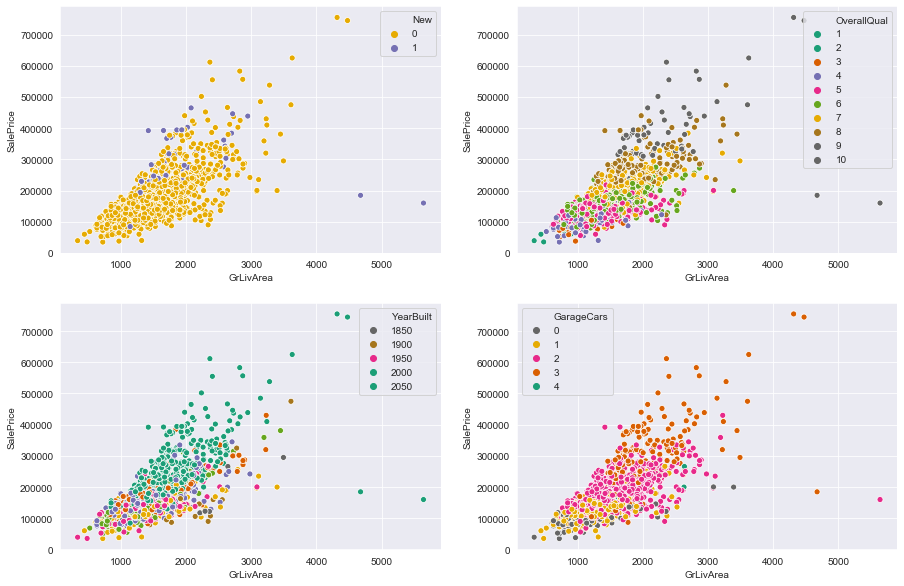

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=houses_df, hue='New', palette='Dark2_r', legend='full')
plt.subplot(222)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=houses_df, hue='OverallQual', palette='Dark2', legend='full')
plt.subplot(223)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=houses_df, hue='YearBuilt', palette='Dark2_r')
plt.subplot(224)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=houses_df, hue='GarageCars', palette='Dark2_r', legend='full')
plt.show()

### From the above plots the outliers in 'GrLivArea' & 'TotalBsmtSF':
1. are **New** houses and as seen before on an average New houses are more expensive.
2. have **OverallQual** as 9, which is very high.
3. **YearBuilt** in 2000's, the Price should be high as per the exponential trend.
4. **GarageCars** are 2 and 3, but from the scatter plot between **GarageCars** & **SalePrice** it is evident that the prices increase with this.

Still, the prices of these houses are less. This can be due to the following reasons:

- The houses are located in the developing or outskirts area.
- The land is an agricultural land, since usually the prices are less in these areas.

### Check how categorical features behave with regard to 'SalePrice'

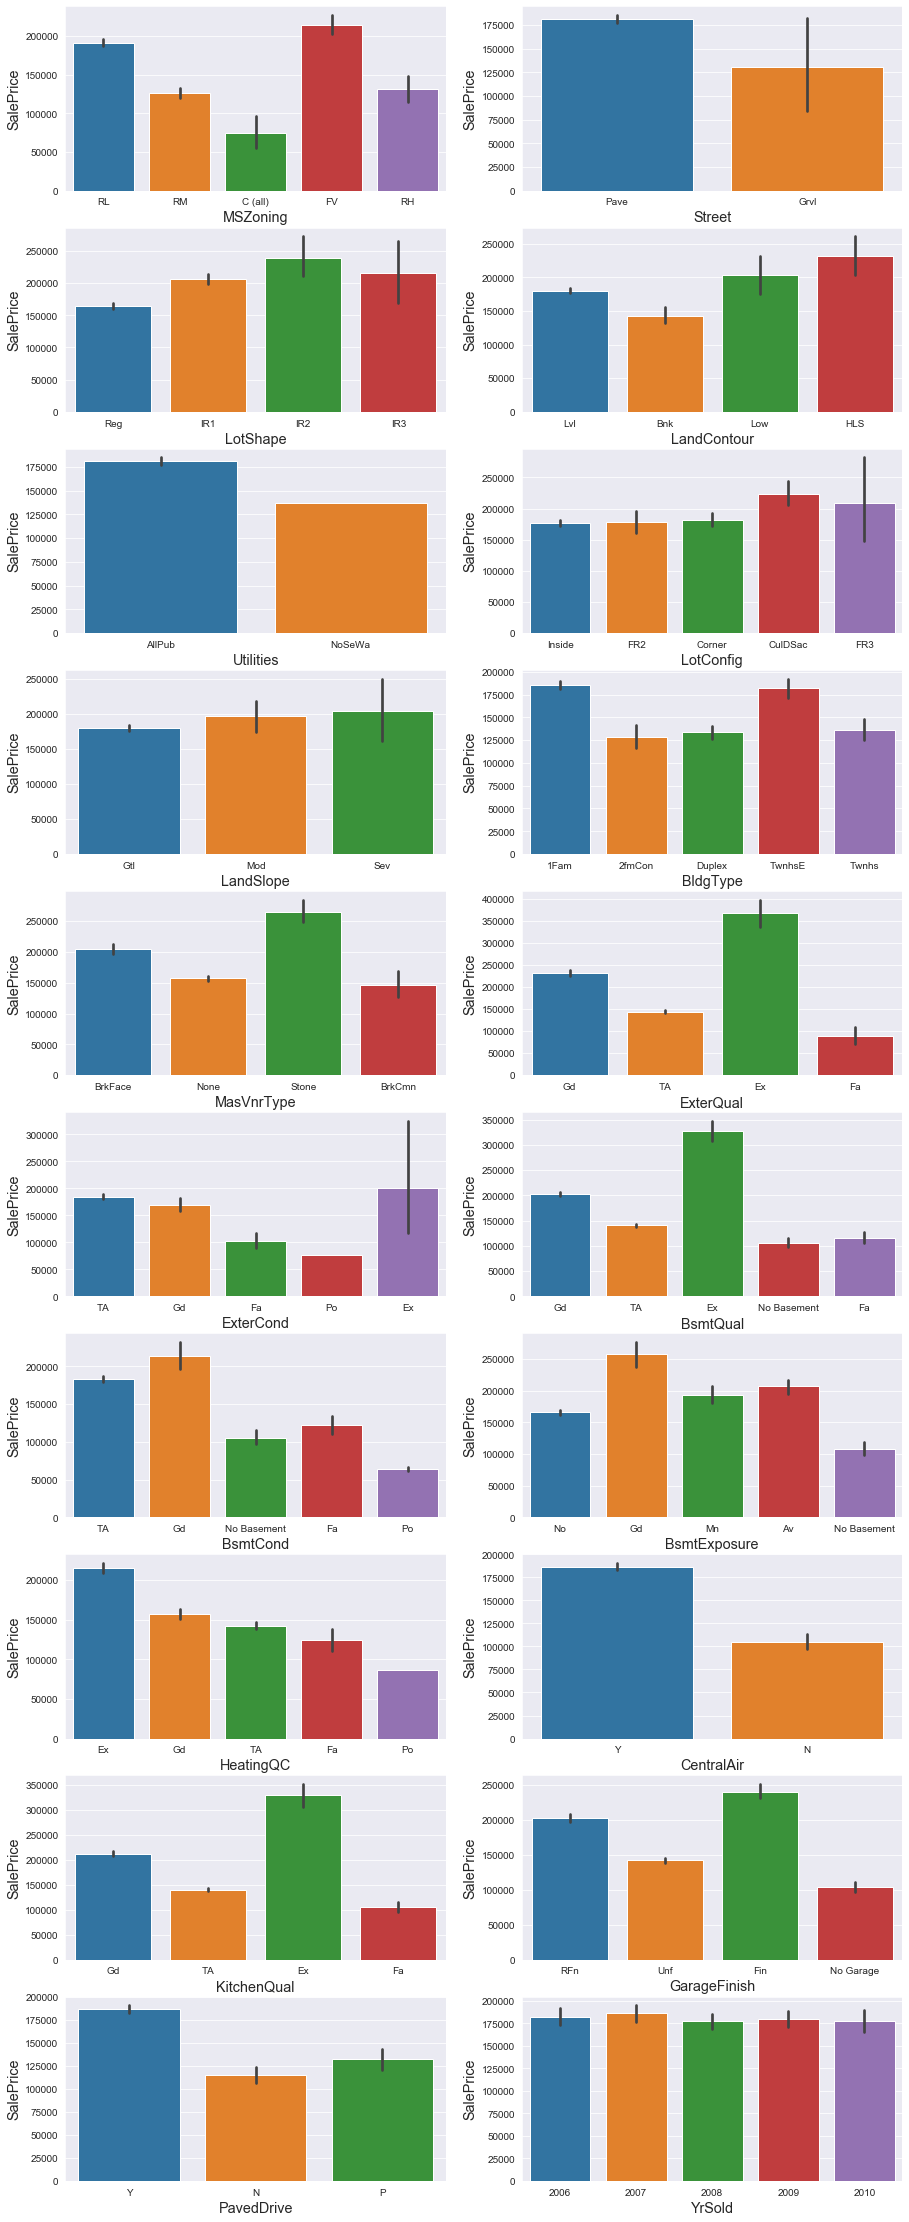

In [51]:
# extract columns that less than or equal to 5 levels
cat_cols_for_plot = []
for col in cat_cols:
    if houses_df[col].nunique() <= 5:
        cat_cols_for_plot.append(col)

# create bar plots of categorical columns vs 'SalePrice'        
barplot(cat_cols_for_plot, houses_df['SalePrice'],(15,40), np.mean, 'SalePrice')        

## Inferences on the features that have huge variations w.r.t SalePrice:
1. **MSZoning** (*Identifies the general zoning classification of the sale.*):
    - Commercial - have lowest average Sale Price
    - FV Floating Village Residential - have highest average Sale Price
    
    
2. **Street** (*Type of road access to property*):
    - Gravel - have lowest average Sale Price
    - Paved - have highest average Sale Price
    
    
3. **Utilities** (*Type of utilities available*):
    - Electricity, Gas, and Water (Septic Tank) - have lowest average Sale Price
    - All public Utilities (E,G,W,& S) - have highest average Sale Price
    
    
4. **MasVnrType** (*Masonry veneer type*):
    - Brick Common - have lowest average Sale Price
    - Stone - have highest average Sale Price
    

5. **ExterQual** (*Evaluates the quality of the material on the exterior*):
    - Fair - have lowest average Sale Price
    - Excellent - have highest average Sale Price
    
    
6. **ExterCond** (*Evaluates the present condition of the material on the exterior*):
    - Poor - have lowest average Sale Price
    - Excellent - have highest average Sale Price
    
    
7. **BsmtQual** (*Evaluates the height of the basement*):
    - No Basement - have lowest average Sale Price
    - Excellent (100+ inches) - have highest average Sale Price
    
    
8. **HeatingQC** (*Heating quality and condition*):
    - Poor - have lowest average Sale Price
    - Excellent - have highest average Sale Price
    
    
9. **CentralAir** (*Central air conditioning*):
    - No - have lowest average Sale Price
    - Yes - have highest average Sale Price
    
    
10. **KitchenQual** (*Kitchen quality*):
    - Fair - have lowest average Sale Price
    - Excellent - have highest average Sale Price
    
    
11. **GarageFinish** (*Interior finish of the garage*):
    - No Garage - have lowest average Sale Price
    - Finished - have highest average Sale Price
    
    
12. **PavedDrive** (*Paved driveway*):
    - Dirt/Gravel - have lowest average Sale Price
    - Paved - have highest average Sale Price

## Check distribution of the target variable (SalePrice)

In [52]:
# function to create distplot
def distplot(col):
    plt.figure(figsize=(10,7))
    plt.xlabel(col, fontsize='x-large')
    sns.distplot(houses_df[col],color='green')
    plt.show()

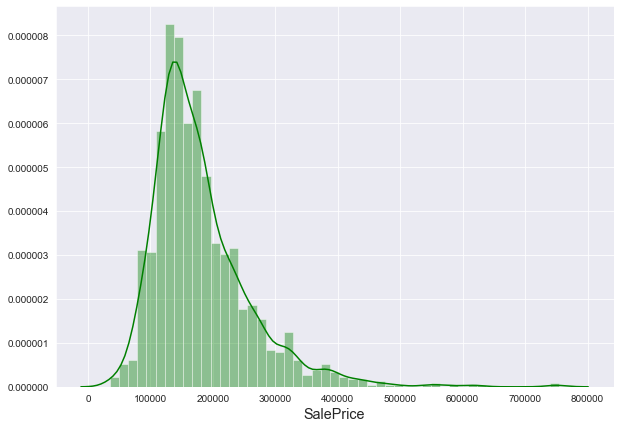

In [53]:
# plot the distribution of SalePRice
distplot('SalePrice')

**SalePrice** is not normally distributed. It has some skewness at the right tail. The problem can be solved by taking a log transformation of it.

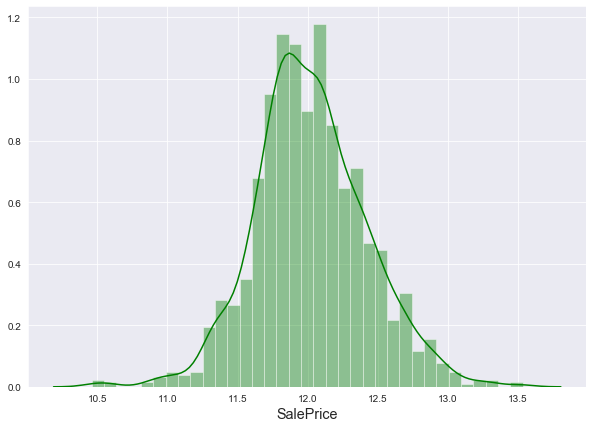

In [54]:
# convert to log
houses_df['SalePrice'] = np.log(houses_df['SalePrice'])

# plot the log version of Sale Price
distplot('SalePrice')

## Step 3: Prepare the data for modelling

### Dealing with Categorical and Numerical Variables
1. Dummies of categorical columns
    
    
2. Splitting data frame into train and test


3. Rescaling of numerical variables


In [55]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(houses_df)
num_cols = get_num_cols(houses_df)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 40
Numerical Columns: 35


In [56]:
# check categorical columns data
houses_df.loc[:,cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,TA,Typ,TA,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal


### 3.1. Dummy creation

In [57]:
# print levels of all the potential columns for dummies
for col in cat_cols:
    print('-------------------------' + col + '--------------------------')
    print(houses_df[col].value_counts())
    print()

-------------------------MSZoning--------------------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

-------------------------Street--------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64

-------------------------LotShape--------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

-------------------------LandContour--------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

-------------------------Utilities--------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

-------------------------LotConfig--------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

-------------------------LandSlope--------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

------------------

From the above display data, i.e., value_counts() of categorical features, it seems that **alot of features have imbalances**. There is one level in most of the features that constitute the majority of the occurence. Let's plot and check the features whose one of the level is **more than 80% data** related to one level

In [58]:
# check columns that have more than or equal to 85% data related to one value
cols_to_drop = []
for col in cat_cols:
    if houses_df[col].value_counts().max() >= 0.80*houses_df.shape[0]:
        cols_to_drop.append(col)
        
print(cols_to_drop)  
print('\nNumber of columns:', len(cols_to_drop))

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Number of columns: 19


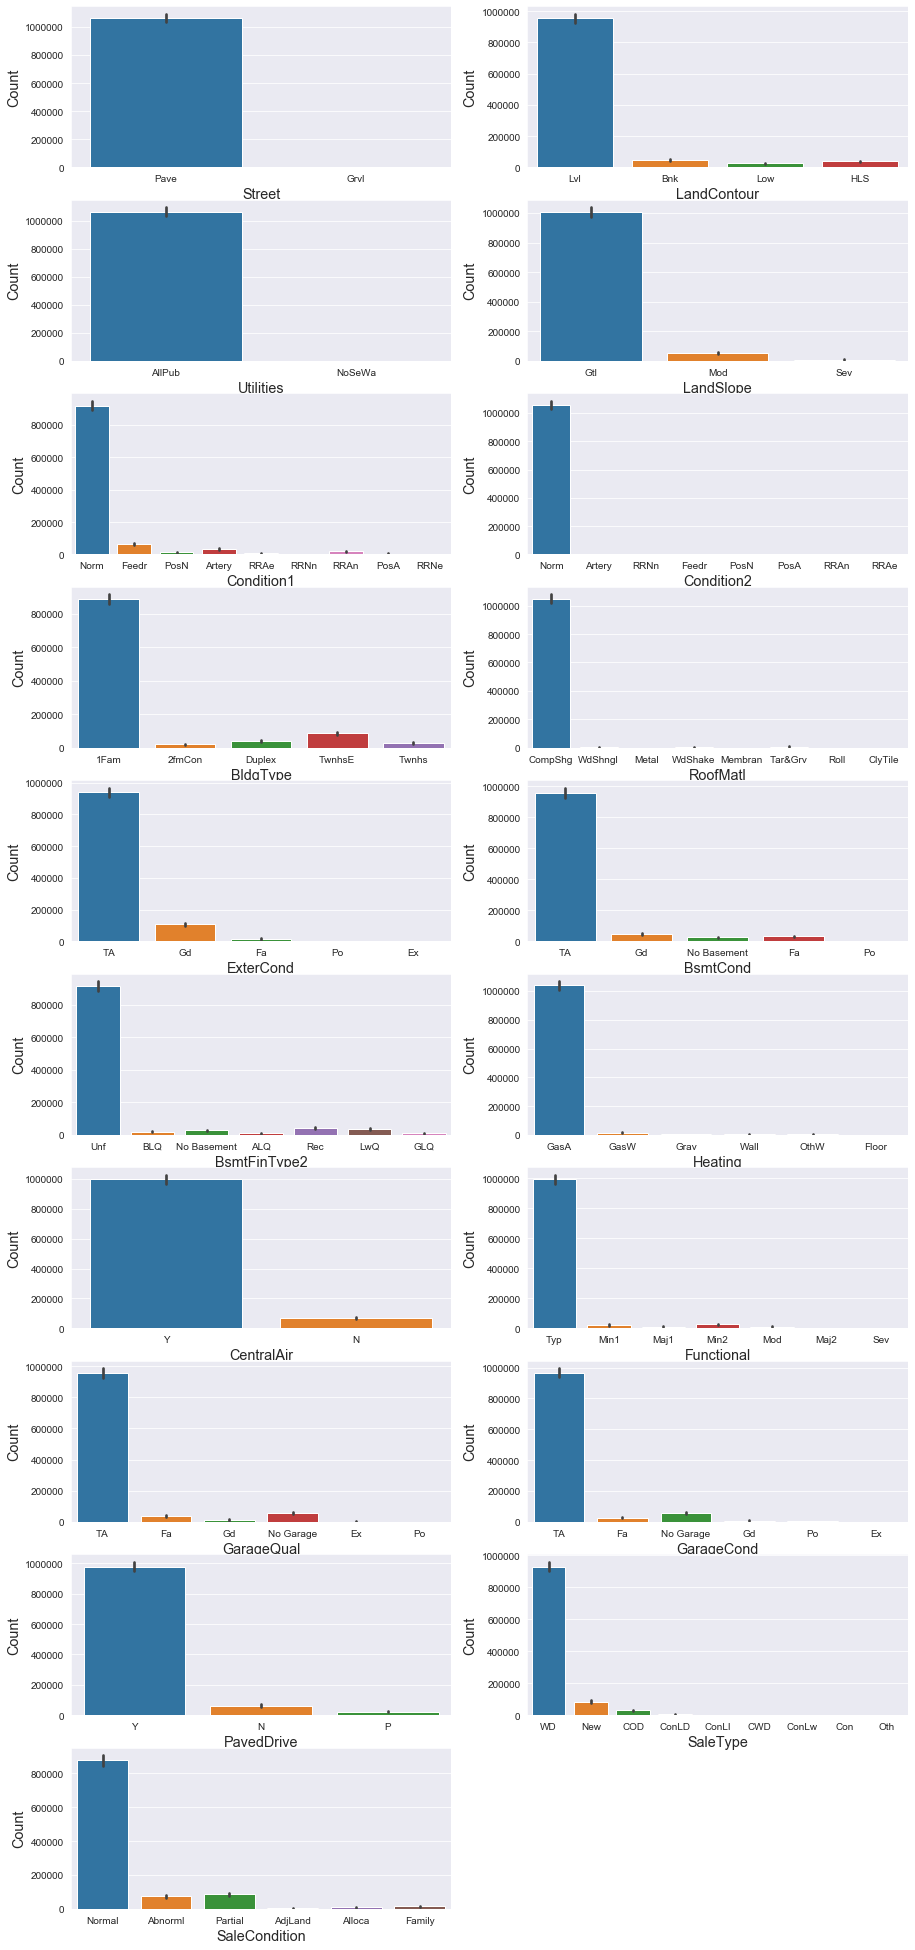

In [59]:
# visualize the categorical columns with imbalances
barplot(cols_to_drop, houses_df.index,(15,35), sum, 'Count')

As seen from the graphs above, there is huge data imbalance in those columns. Let's drop them since they **WON't be helpful in predicting the prices of the houses**.

In [60]:
# drop the columns
drop_columns(cols_to_drop)

# empty the list
cols_to_drop = []

# check shape again
houses_df.shape

(1460, 56)

In [61]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(houses_df)
num_cols = get_num_cols(houses_df)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 21
Numerical Columns: 35


In [62]:
# create dummmies
dummies = pd.get_dummies(houses_df[cat_cols], drop_first=True)

# adding the results into the main data frame
houses_df = pd.concat([houses_df,dummies], axis=1)

# drop the original variables
houses_df.drop(columns=cat_cols, axis=1, inplace=True)

In [63]:
# check head
houses_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Rebuilt,Age,New,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,1,60,65.0,8450,7,5,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2003.0,2,0,61,0,0,0,0,0,12.247694,0,5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,1976.0,2,298,0,0,0,0,0,0,12.109011,0,31,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,3,60,68.0,11250,7,5,2001,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,2001.0,2,0,42,0,0,0,0,0,12.317167,1,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,0.0,216,0,540,756,756,0,1717,1,0,1,0,3,1,1,1998.0,3,0,35,272,0,0,0,0,11.849398,1,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [64]:
# check shape again
houses_df.shape

(1460, 172)

### 3.2 Split into train and test set

In [65]:
# removing variables 'Id' and 'SalePrice' and putting the rest into X, 
# since these variables will not be used for modelling
# 'Id' feature will be used to identify the houses.
# and the variable 'SalePrice' is the target variable

# first lets check the unique values for both the columns
houses_df[['Id','SalePrice']].nunique()

Id           1460
SalePrice     663
dtype: int64

In [66]:
# split into train and test
houses_train, houses_test = train_test_split(houses_df, train_size=0.7,test_size=0.3, random_state=100)

In [67]:
# check shapes
print('houses_train: ', houses_train.shape)
print('houses_test: ', houses_test.shape)

houses_train:  (1021, 172)
houses_test:  (438, 172)


In [68]:
# putting target variable of train set to 'y_train'
y_train = houses_train['SalePrice']

y_train.head()

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
Name: SalePrice, dtype: float64

In [69]:
# putting target variable of train set to 'y_test'
y_test = houses_test['SalePrice']

y_test.head()

1436    11.699405
57      12.188418
780     12.078239
382     12.271392
1170    12.049419
Name: SalePrice, dtype: float64

In [70]:
# create X_train
X_train = houses_train.drop(['Id','SalePrice'], axis=1)

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Rebuilt,Age,New,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
210,30,67.0,5604,5,6,1925,0.0,468,0,396,864,0,0,864,1,0,1,0,2,1,0,1980.0,0,0,0,96,0,0,0,0,1,58,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
318,60,90.0,9900,7,5,1993,256.0,987,0,360,1347,1274,0,2646,1,0,2,1,4,1,1,1993.0,3,340,60,144,0,0,0,0,0,16,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
239,50,52.0,8741,6,4,1945,0.0,94,0,641,735,689,0,1487,0,0,1,1,3,1,1,1949.0,1,0,140,0,0,0,0,0,1,60,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
986,50,59.0,5310,6,8,1910,0.0,0,0,485,485,634,0,1635,0,0,1,0,2,1,0,1950.0,1,394,0,0,0,0,0,0,1,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [71]:
# create X_test
X_test = houses_test.drop(['Id','SalePrice'], axis=1)

X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Rebuilt,Age,New,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1436,20,60.0,9000,4,6,1971,0.0,616,0,248,864,0,0,864,0,0,1,0,3,1,0,1974.0,2,0,0,0,0,0,0,0,0,36,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
57,60,89.0,11645,7,5,2004,0.0,0,0,860,860,860,0,1720,0,0,2,1,3,1,0,2004.0,2,0,70,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
780,20,63.0,7875,7,5,1995,38.0,0,0,1237,1237,0,0,1253,0,0,2,0,3,1,1,1995.0,2,220,21,0,0,0,0,0,1,11,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
382,60,79.0,9245,7,5,2006,0.0,0,0,939,939,858,0,1797,0,0,2,1,3,1,0,2006.0,2,144,53,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0

### 3.3 Rescale the numerical variables

In [72]:
# extract categorical and numerical columns in respective lists
cat_cols = get_cat_cols(X_train)
num_cols = get_num_cols(X_train)

print('Categorical Columns: {0}'.format(len(cat_cols)))
print('Numerical Columns: {0}'.format(len(num_cols)))

Categorical Columns: 0
Numerical Columns: 33


In [73]:
# check head of numerical features
X_train[num_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Rebuilt,Age,New
210,30,67.0,5604,5,6,1925,0.0,468,0,396,864,0,0,864,1,0,1,0,2,1,0,1980.0,0,0,0,96,0,0,0,0,1,58,0
318,60,90.0,9900,7,5,1993,256.0,987,0,360,1347,1274,0,2646,1,0,2,1,4,1,1,1993.0,3,340,60,144,0,0,0,0,0,16,0
239,50,52.0,8741,6,4,1945,0.0,94,0,641,735,689,0,1487,0,0,1,1,3,1,1,1949.0,1,0,140,0,0,0,0,0,1,60,0
986,50,59.0,5310,6,8,1910,0.0,0,0,485,485,634,0,1635,0,0,1,0,2,1,0,1950.0,1,394,0,0,0,0,0,0,1,3,0
1416,190,60.0,11340,4,6,1885,0.0,0,0,777,777,1044,0,2290,0,0,2,0,4,2,0,1971.0,2,0,0,114,0,0,0,0,1,60,0


#### There are 33 numerical variables, but all of them need not be rescaled. The binary variables need not  be scaled, since the interpretability of them will be lost. The binary variables are:
1. Rebuilt
2. New

#### Let's take out these variables from the num_cols list. There will be 31 variables left.

In [74]:
# pop the binary variables from the 'num_cols_train' list
num_cols_X_train = list(num_cols)

binary_cols = ['Rebuilt', 'New']
for col in binary_cols:
    num_cols_X_train.pop(num_cols_X_train.index(col))

In [75]:
# check head of numerical features again
X_train[num_cols_X_train].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age
210,30,67.0,5604,5,6,1925,0.0,468,0,396,864,0,0,864,1,0,1,0,2,1,0,1980.0,0,0,0,96,0,0,0,0,58
318,60,90.0,9900,7,5,1993,256.0,987,0,360,1347,1274,0,2646,1,0,2,1,4,1,1,1993.0,3,340,60,144,0,0,0,0,16
239,50,52.0,8741,6,4,1945,0.0,94,0,641,735,689,0,1487,0,0,1,1,3,1,1,1949.0,1,0,140,0,0,0,0,0,60
986,50,59.0,5310,6,8,1910,0.0,0,0,485,485,634,0,1635,0,0,1,0,2,1,0,1950.0,1,394,0,0,0,0,0,0,3
1416,190,60.0,11340,4,6,1885,0.0,0,0,777,777,1044,0,2290,0,0,2,0,4,2,0,1971.0,2,0,0,114,0,0,0,0,60


In [76]:
# instantiate the StandardScaler object
scaler_obj = StandardScaler()

# rescale the numerical variables
X_train[num_cols_X_train] = scaler_obj.fit_transform(X_train[num_cols_X_train])

# check head
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Rebuilt,Age,New,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.524903,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.925422,0.048537,-2.366798,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,1,1.704092,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.717033,0.809137,1.160345,-0.293313,-0.454644,0.621579,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0.623522,0.591737,1.645101,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,0,-0.333918,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-0.865510,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,0.795996,-0.124502,-0.056465,-0.837450,-0

In [77]:
# rescale the numerical variables of test set
X_test[num_cols_X_train] = scaler_obj.transform(X_test[num_cols_X_train])

# check head
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Rebuilt,Age,New,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.008299,-0.558025,0.361992,-0.293313,-0.704396,-0.430911,-0.787597,-0.124502,-1.228053,-0.837450,-0.247791,-1.026085,-0.751723,0.176772,-0.234155,-0.925422,-0.202170,0.307802,-0.743160,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,0,0.636563,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
57,0.035976,0.881585,0.112505,0.649651,-0.533005,1.079700,-0.558025,-0.963574,-0.293313,0.660317,-0.439628,1.189021,-0.124502,0.381706,-0.837450,-0.247791,0.786428,1.246998,0.176772,-0.234155,-0.925422,1.051368,0.307802,-0.743160,0.349201,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,0,-1.013254,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.782973,-0.355087,-0.963574,-0.293313,1.500998,0.381881,-0.787597,-0.124502,-0.496515,-0.83745

## Step 4: Modelling

1. Ridge Regression
2. Lasso Regression

In [78]:
# cross validation
def gridsearch(estimator,params,folds):
    model = GridSearchCV(estimator= estimator,
                            param_grid = params,
                            scoring = 'neg_mean_absolute_error',
                            cv = folds,
                            return_train_score=True,
                            verbose =1)
    
    # fit the model
    return model.fit(X_train,y_train)

In [79]:
# Generic function to create ridge model
def ridgemodel(alpha,X,y):
    ridge = Ridge(alpha=alpha)

    # fit the model
    return ridge.fit(X,y)

In [80]:
# Generic function to create lasso model
def lassomodel(alpha,X,y):
    lasso = Lasso(alpha=alpha)

    # fit the model
    return ridge.fit(X,y)

## 4.1 Ridge Regression

In [81]:
# list of random alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds=5
# create model based on grid search cv
ridge_model_cv = gridsearch(ridge,params,folds)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


In [82]:
# generic function to plot mean test and train score with alpha
def plot_alpha(cv_results):
    plt.figure(figsize=(10,6))
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha', fontsize='x-large')
    plt.ylabel('Negative mean absolute error', fontsize='x-large')
    plt.title('Negative mean absolute error vs alpha', fontsize='xx-large')
    plt.legend(['train_score','test_score'])
    plt.show

In [83]:
# create data frame to store results of the model
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(
                                                                                                by = ['rank_test_score']).head()

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,50,-0.084545,-0.094673,1
25,100,-0.086980,-0.094962,2
23,20,-0.082298,-0.095066,3
22,10,-0.081033,-0.095747,4
21,9,-0.080875,-0.095889,5


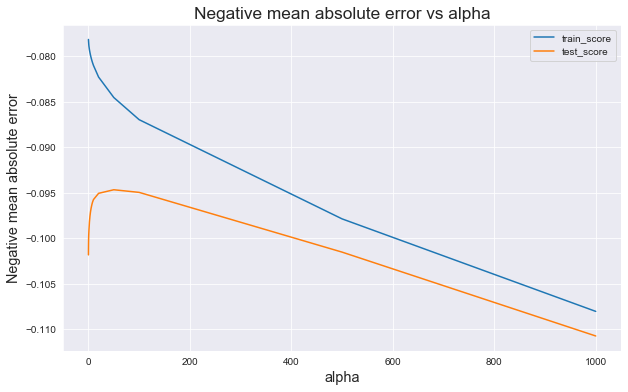

In [84]:
# plot with the complete range of alpha
plot_alpha(cv_results)

The optimal alpha seems to lie between 0-100. Let's zoom the plot and check

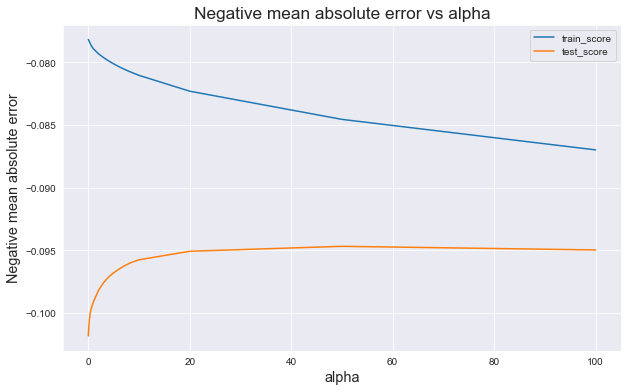

In [85]:
# extract data from cv_results that are less than 100 and plot
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <=100]
plot_alpha(cv_results)

The **optimal alpha** looks like to be between **40-60**, since the **test score rises** between this range and then **flattens out**. Let's check the best estimator and conclude on the optimal value of hyperparameter. 

In [86]:
# check the best alpha value
ridge_model_cv.best_estimator_

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

The optimal value indeed is **50**. Let's create a ***ridge model*** with alpha as 50.

In [87]:
# create ridge model with the below apha
alpha = 50
model_ridge = ridgemodel(alpha,X_train,y_train)

# check coefficients
model_ridge.coef_[:10]

array([-0.02282076, -0.00487125,  0.01814175,  0.09097063,  0.04459707,
        0.04019117,  0.00171911,  0.00888062,  0.00295879,  0.01342115])

In [88]:
# get predictions on train set
y_train_pred = model_ridge.predict(X_train)
y_train_pred[:10]

array([11.43835653, 12.66346955, 11.69001563, 11.82432501, 11.60844155,
       11.72161213, 11.86625061, 12.5334215 , 11.34127413, 12.30206806])

In [89]:
# generic function to calculate model scores
def check_scores(y_true,y_pred,train_or_test):
    
#     MSE score
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    print('MSE Score '  + '(' + train_or_test + '): ' '{0}'.format(round(mse,2)))
    
#     RMSE score
    rmse = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))
    print('RMSE Score '  + '(' + train_or_test + '): ' '{0}'.format(round(rmse,2)))
    
#     R-Squared score
    r2 = r2_score(y_true=y_true,y_pred=y_pred)
    print('R2 Score ' + '(' + train_or_test + '): ' '{0}'.format(round(r2,2)))
    

In [90]:
# check score of model based on Train set
check_scores(y_train, y_train_pred, 'Train')

MSE Score (Train): 0.02
RMSE Score (Train): 0.13
R2 Score (Train): 0.9


### Ridge: Prdiction on test set

In [91]:
# get predictions on test set
y_test_pred = model_ridge.predict(X_test)
y_test_pred[:10]

array([11.64545002, 12.15097614, 12.09133617, 12.21469583, 11.60724271,
       12.49061449, 12.32531393, 12.54933698, 11.67210949, 12.06149748])

In [92]:
# check score of model based on Train set
check_scores(y_test, y_test_pred, 'Test')

MSE Score (Test): 0.02
RMSE Score (Test): 0.14
R2 Score (Test): 0.87


In [93]:
# generic function to create data frame with feature-coef relation of a model
def create_data_frame_model_feature_coeff(model,X):
    
    model_parameters = list(model.coef_)
    model_parameters.insert(0,model.intercept_)
    model_parameters = [round(x,3) for x in model_parameters]
    cols = X.columns
    cols = cols.insert(0, 'constant')
    
    data = {'Features': cols, 'Coefficients': model_parameters}
    model_df = pd.DataFrame(data)
    model_df.sort_values(by='Coefficients', ascending=False, inplace=True)
    model_df.reset_index(inplace=True, drop=True)
    return model_df

In [94]:
# get data frame of ridge models' features with their coeff
ridge_df = create_data_frame_model_feature_coeff(model_ridge, X_train)

# check head (top 5 positive features, excluding the constant)
ridge_df.head(6)

,Features,Coefficients
0,constant,12.051
1,OverallQual,0.091
2,GrLivArea,0.082
3,Neighborhood_Crawfor,0.053
4,GarageCars,0.049
5,OverallCond,0.045


In [95]:
# check tail (top 5 negative features)
ridge_df.tail()

,Features,Coefficients
166,FireplaceQu_No Fireplace,-0.027
167,BsmtQual_Gd,-0.028
168,Neighborhood_IDOTRR,-0.031
169,BsmtFinType1_Unf,-0.031
170,Neighborhood_Edwards,-0.050


## 4.2 Lasso Regression

In [96]:
# list of random alphas to tune
params = {'alpha': [0.0001, 0.0002,0.0003,0.0004,0.0005,0.001, 0.002,0.003,0.005, 0.01]}

lasso = Lasso()

folds=5
# create model based on grid search cv
lasso_model_cv = gridsearch(lasso,params,folds)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.2s finished


In [97]:
# create data frame to store results of the model
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(
                                                                                                by = ['rank_test_score']).head()

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.002,-0.086549,-0.094129,1
5,0.001,-0.083557,-0.094178,2
4,0.0005,-0.081370,-0.095149,3
3,0.0004,-0.080720,-0.095465,4
2,0.0003,-0.080006,-0.095547,5


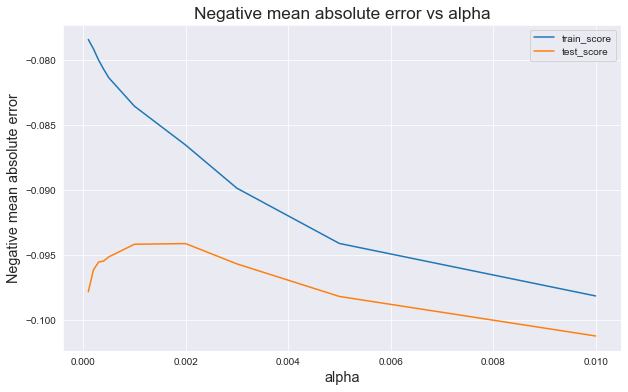

In [98]:
# plot with the complete range of alpha
plot_alpha(cv_results)

In [99]:
# check the best alpha value
lasso_model_cv.best_estimator_

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
lasso_model_cv.best_score_

-0.09412870080886494

In [101]:
# create lasso model with the below apha
alpha = 0.002
model_lasso = lassomodel(alpha,X_train,y_train)

# check coefficients
model_lasso.coef_[:10]

array([-0.02531352, -0.00873506,  0.02132377,  0.07387533,  0.04233389,
        0.02605468, -0.00612168, -0.00368854, -0.00100851,  0.00886815])

In [102]:
# get predictions on train set
y_train_pred = model_lasso.predict(X_train)
y_train_pred[:10]

array([11.41924414, 12.73684927, 11.69496654, 11.8729652 , 11.66635716,
       11.70903251, 11.89471642, 12.51277718, 11.32037743, 12.42654145])

In [103]:
# check score of model based on Train set
check_scores(y_train, y_train_pred, 'Train')

MSE Score (Train): 0.01
RMSE Score (Train): 0.11
R2 Score (Train): 0.92


### Lasso: Prdiction on test set

In [104]:
# get predictions on test set
y_test_pred = model_lasso.predict(X_test)
y_test_pred[:10]

array([11.62269415, 12.11742528, 12.07748275, 12.19075328, 11.67785876,
       12.54924464, 12.3247322 , 12.49865573, 11.59652655, 12.11182849])

In [105]:
# check score of model based on Train set
check_scores(y_test, y_test_pred, 'Test')

MSE Score (Test): 0.02
RMSE Score (Test): 0.14
R2 Score (Test): 0.88


In [106]:
# get data frame of lasso models' features with their coeff
lasso_df = create_data_frame_model_feature_coeff(model_lasso, X_train)

# check head (top 5 positive features, excluding the constant)
lasso_df.head(6)

,Features,Coefficients
0,constant,11.829
1,MSZoning_RL,0.229
2,MSZoning_RH,0.218
3,MSZoning_FV,0.201
4,MSZoning_RM,0.183
5,Neighborhood_Crawfor,0.161


In [107]:
# check tail (top 5 negative features)
lasso_df.tail()

,Features,Coefficients
166,BsmtQual_TA,-0.085
167,LotShape_IR3,-0.101
168,HeatingQC_Po,-0.105
169,Exterior1st_BrkComm,-0.105
170,Neighborhood_MeadowV,-0.129


In [108]:
# get features who's coefficients were made 0 by lasso's feature selection
lasso_df.loc[lasso_df['Coefficients'] == 0]

,Features,Coefficients
90,LotConfig_Inside,-0.0
91,HouseStyle_SFoyer,-0.0
92,Exterior1st_Stone,-0.0
93,Exterior2nd_Other,0.0


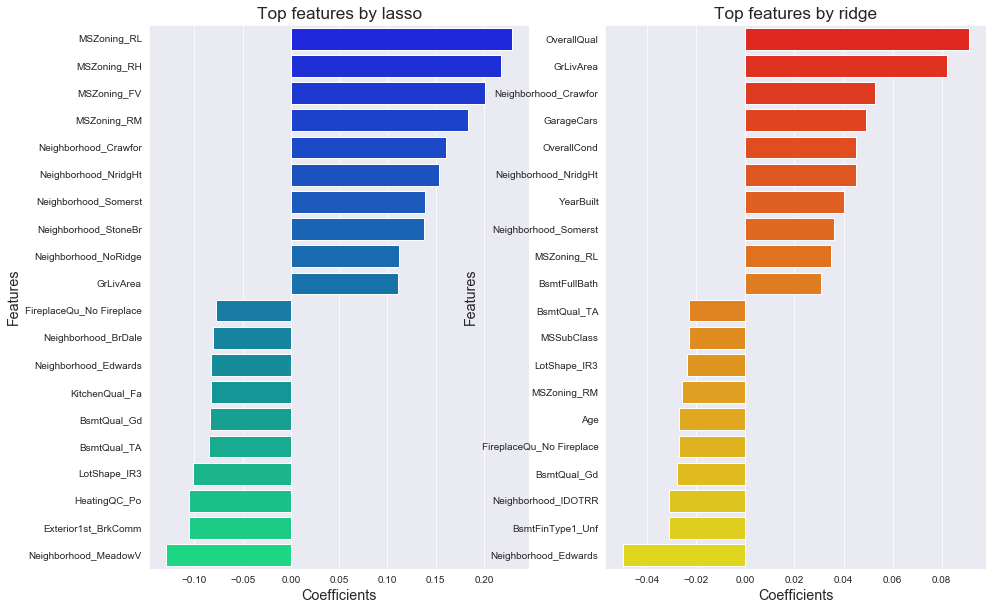

In [109]:
# plot the top 10 positive and top 10 negative features which are significant in predicting the price of the house
plt.figure(figsize=(15,10))

df = lasso_df[1:11]
df1 = lasso_df[-10:]
final_df = pd.concat([df,df1])
plt.subplot(121)
plt.xlabel('Coefficients', fontsize='x-large')
plt.ylabel('Features', fontsize='x-large')
plt.title('Top features by lasso', fontsize='xx-large')
sns.barplot(y='Features', x='Coefficients', data=final_df, palette='winter')

df = ridge_df[1:11]
df1 = ridge_df[-10:]
final_df = pd.concat([df,df1])
plt.subplot(122)
plt.xlabel('Coefficients', fontsize='x-large')
plt.ylabel('Features', fontsize='x-large')
plt.title('Top features by ridge', fontsize='xx-large')
sns.barplot(y='Features', x='Coefficients', data=final_df, palette='autumn')
plt.show()

---

# Summary

### Which variables are significant in predicting the price of a house?

After combining the results from both ridge and lasso, the above features will be significant in predicting the price of a house. Mostly the following will help:
- **MSZoning** (Identifies the general zoning classification of the sale.)
- **Neighborhood** (Physical locations within Ames city limits)
- **GrLivArea** (Above grade (ground) living area square feet)
- **GarageCars** (Size of garage in car capacity)
- **Age** (Age of the house)


### How well those variables describe the price of a house?

Based on EDA and models, the above features will surely help in predicting the price of a house.


### Optimal values of Lambda for ridge and lasso


- Ridge: 50
- Lasso: 0.002



### Test Scores of ridge and lasso

|Scores|Ridge|Lasso|
|--|--|--|
|MSE (Train)|0.02| 0.01|
|MSE (Test)|0.02| 0.02|
|RMSE (Train)|0.13| 0.11|
|RMSE (Test)|0.14| 0.14|
|R2 (Train)| 0.90|0.92|
|R2 (Test)| 0.87|0.88|

---

# Additional Coding to answer Subjective Questions

### For Answer 1

In [110]:
# create ridge model with the double the alpha
alpha = 100
model_ridge = ridgemodel(alpha,X_train,y_train)

# get predictions on train set
y_train_pred = model_ridge.predict(X_train)

# get predictions on test set
y_test_pred = model_ridge.predict(X_test)

In [111]:
# check score of model based on Train set
check_scores(y_train, y_train_pred, 'Train')

MSE Score (Train): 0.02
RMSE Score (Train): 0.13
R2 Score (Train): 0.89


In [112]:
# check score of model based on Train set
check_scores(y_test, y_test_pred, 'Test')

MSE Score (Test): 0.02
RMSE Score (Test): 0.15
R2 Score (Test): 0.87


In [113]:
# get data frame of ridge models' features with their coeff
ridge_df = create_data_frame_model_feature_coeff(model_ridge, X_train)

# check head (top 5 positive features, excluding the constant)
ridge_df.head(6)

,Features,Coefficients
0,constant,12.050
1,OverallQual,0.088
2,GrLivArea,0.072
3,GarageCars,0.049
4,OverallCond,0.042
5,YearBuilt,0.037


In [114]:
# create lasso model with the double the apha
alpha = 0.004
model_lasso = lassomodel(alpha,X_train,y_train)

# get predictions on train set
y_train_pred = model_lasso.predict(X_train)

# get predictions on test set
y_test_pred = model_lasso.predict(X_test)

In [115]:
# check score of model based on Train set
check_scores(y_train, y_train_pred, 'Train')

MSE Score (Train): 0.01
RMSE Score (Train): 0.11
R2 Score (Train): 0.92


In [116]:
# check score of model based on Train set
check_scores(y_test, y_test_pred, 'Test')

MSE Score (Test): 0.02
RMSE Score (Test): 0.14
R2 Score (Test): 0.88


In [117]:
# get data frame of lasso models' features with their coeff
lasso_df = create_data_frame_model_feature_coeff(model_lasso, X_train)

# check head (top 5 positive features, excluding the constant)
lasso_df.head(6)

,Features,Coefficients
0,constant,11.829
1,MSZoning_RL,0.229
2,MSZoning_RH,0.218
3,MSZoning_FV,0.201
4,MSZoning_RM,0.183
5,Neighborhood_Crawfor,0.161


In [118]:
# get features who's coefficients were made 0 by lasso's feature selection
lasso_df.loc[lasso_df['Coefficients'] == 0]

,Features,Coefficients
90,LotConfig_Inside,-0.0
91,HouseStyle_SFoyer,-0.0
92,Exterior1st_Stone,-0.0
93,Exterior2nd_Other,0.0


### For Answer 3

In [119]:
# get top 5 variables built using lasso with alpha = 0.002
five_imp_var_lasso = ['MSZoning_RL', 'MSZoning_RH', 'MSZoning_FV', 'MSZoning_RM', 'Neighborhood_Crawfor']

# drop these variables from train and test data
X_train.drop(columns=five_imp_var_lasso, axis=1, inplace=True)
X_test.drop(columns=five_imp_var_lasso, axis=1, inplace=True)

In [120]:
# check shape
X_train.shape

(1021, 165)

In [121]:
X_test.shape

(438, 165)

In [122]:
# list of random alphas to tune
params = {'alpha': [0.0001, 0.0002,0.0003,0.0004,0.0005,0.001, 0.002,0.003,0.005, 0.01]}

lasso = Lasso()

folds=5
# create model based on grid search cv
lasso_model_cv = gridsearch(lasso,params,folds)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.5s finished


In [123]:
# create data frame to store results of the model
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(
                                                                                                by = ['rank_test_score']).head()

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.002,-0.089190,-0.096774,1
5,0.001,-0.086207,-0.097021,2
7,0.003,-0.092164,-0.097718,3
4,0.0005,-0.083661,-0.097767,4
3,0.0004,-0.083134,-0.098293,5


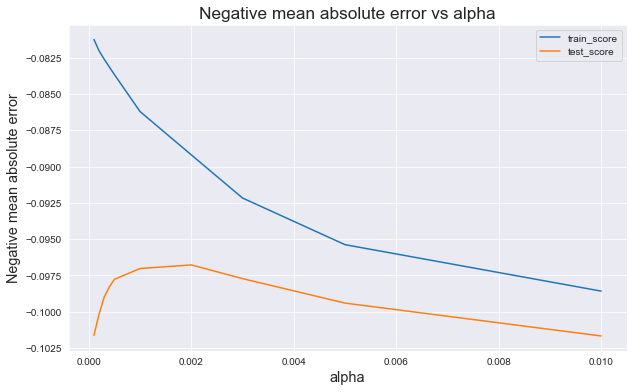

In [124]:
# plot with the complete range of alpha
plot_alpha(cv_results)

In [125]:
# check the best alpha value
lasso_model_cv.best_estimator_

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [126]:
# create lasso model with below alpha
alpha = 0.002
model_lasso = lassomodel(alpha,X_train,y_train)

# get predictions on train set
y_train_pred = model_lasso.predict(X_train)

# get predictions on test set
y_test_pred = model_lasso.predict(X_test)

In [127]:
# check score of model based on Train set
check_scores(y_train, y_train_pred, 'Train')

MSE Score (Train): 0.01
RMSE Score (Train): 0.12
R2 Score (Train): 0.91


In [128]:
# check score of model based on Train set
check_scores(y_test, y_test_pred, 'Test')

MSE Score (Test): 0.02
RMSE Score (Test): 0.14
R2 Score (Test): 0.87


In [129]:
# get data frame of lasso models' features with their coeff
lasso_df = create_data_frame_model_feature_coeff(model_lasso, X_train)

# check head (top 5 positive features, excluding the constant)
lasso_df.head(6)

,Features,Coefficients
0,constant,12.113
1,Exterior1st_BrkFace,0.115
2,GrLivArea,0.111
3,Neighborhood_NridgHt,0.100
4,Foundation_Stone,0.098
5,Neighborhood_StoneBr,0.094


In [130]:
# get features who's coefficients were made 0 by lasso's feature selection
lasso_df.loc[lasso_df['Coefficients'] == 0]

,Features,Coefficients
84,2ndFlrSF,0.0
85,GarageType_No Garage,-0.0
86,GarageFinish_No Garage,-0.0
87,Exterior2nd_Other,0.0
